## 라이브러리, 데이터 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

history= pd.read_csv('wowah_data.csv')

print(history.shape)

(10826734, 7)


In [2]:
history.head()

,char,level,race,charclass,zone,guild,timestamp
0,59425,1,Orc,Rogue,Orgrimmar,165,01/01/08 00:02:04
1,65494,9,Orc,Hunter,Durotar,-1,01/01/08 00:02:04
2,65325,14,Orc,Warrior,Ghostlands,-1,01/01/08 00:02:04
3,65490,18,Orc,Hunter,Ghostlands,-1,01/01/08 00:02:04
4,2288,60,Orc,Hunter,Hellfire Peninsula,-1,01/01/08 00:02:09


## 날짜 형식 변경

In [3]:
history[' timestamp']= pd.to_datetime(history[' timestamp'])
history.head()

,char,level,race,charclass,zone,guild,timestamp
0,59425,1,Orc,Rogue,Orgrimmar,165,2008-01-01 00:02:04
1,65494,9,Orc,Hunter,Durotar,-1,2008-01-01 00:02:04
2,65325,14,Orc,Warrior,Ghostlands,-1,2008-01-01 00:02:04
3,65490,18,Orc,Hunter,Ghostlands,-1,2008-01-01 00:02:04
4,2288,60,Orc,Hunter,Hellfire Peninsula,-1,2008-01-01 00:02:09


## 컬럼 명 수정
* char -> user_id
* 앞 공백 제거

In [4]:
history= history.rename({'char' : 'user_id',
                ' level' : 'level',
                ' race' : 'race',
                ' charclass' : 'charclass',
                ' zone' : 'zone',
                ' guild' : 'guild',
                ' timestamp' : 'timestamp'}, axis= 1)

history.columns

Index(['user_id', 'level', 'race', 'charclass', 'zone', 'guild', 'timestamp'], dtype='object')

In [5]:
history.head()

,user_id,level,race,charclass,zone,guild,timestamp
0,59425,1,Orc,Rogue,Orgrimmar,165,2008-01-01 00:02:04
1,65494,9,Orc,Hunter,Durotar,-1,2008-01-01 00:02:04
2,65325,14,Orc,Warrior,Ghostlands,-1,2008-01-01 00:02:04
3,65490,18,Orc,Hunter,Ghostlands,-1,2008-01-01 00:02:04
4,2288,60,Orc,Hunter,Hellfire Peninsula,-1,2008-01-01 00:02:09


## MAU 집계

In [6]:
mau= history[['user_id', 'timestamp']]
mau.head()

,user_id,timestamp
0,59425,2008-01-01 00:02:04
1,65494,2008-01-01 00:02:04
2,65325,2008-01-01 00:02:04
3,65490,2008-01-01 00:02:04
4,2288,2008-01-01 00:02:09


In [7]:
mau['ym']= mau['timestamp'].dt.strftime('%Y-%m')
mau.head()

,user_id,timestamp,ym
0,59425,2008-01-01 00:02:04,2008-01
1,65494,2008-01-01 00:02:04,2008-01
2,65325,2008-01-01 00:02:04,2008-01
3,65490,2008-01-01 00:02:04,2008-01
4,2288,2008-01-01 00:02:09,2008-01


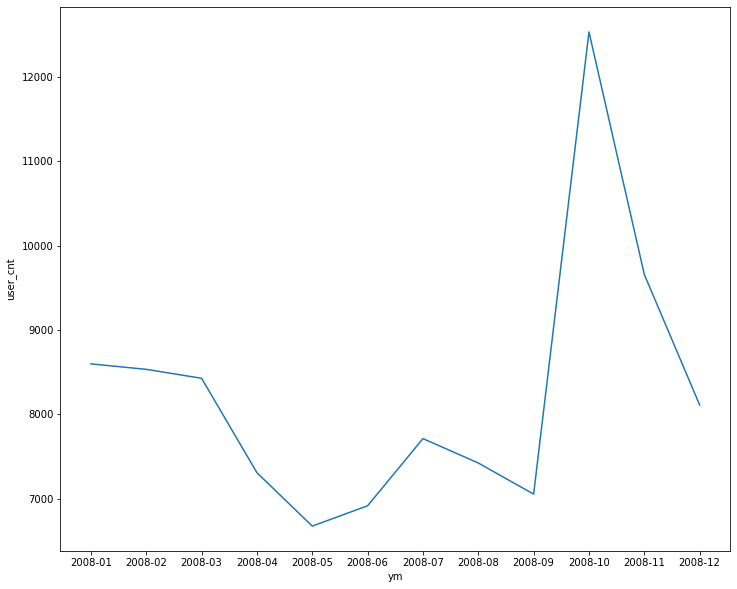

In [8]:
mau= mau.groupby('ym')['user_id'].nunique().reset_index()
mau= mau.rename({'user_id' : 'user_cnt'}, axis= 1)

plt.figure(figsize= (12, 10))
sns.lineplot(data= mau, x= 'ym', y= 'user_cnt')
plt.show()